In [3]:
import pandas as pd
import numpy as np
import random
data=pd.read_csv("FAOLEX.csv")
print(data.keys())
np.random.seed(69)
random.seed(69)

Index(['Record Id', 'Record URL', 'Document URL', 'Title', 'Original title',
       'Date of original text', 'Last amended date', 'Available website',
       'Language of document', 'Country/Territory', 'Regional organizations',
       'Territorial subdivision', 'Type of text', 'Repealed', 'Abstract',
       'Primary subjects', 'Domain', 'Keywords'],
      dtype='object')


In [44]:
import nltk
keywords_nofilter=list(data["Keywords"])
country_nofilter=list(data["Country/Territory"])
i=0
# Split alle keywords op i en liste og ændrer nan til at være en str med Nan
for words in keywords_nofilter:
    if type(words)!=str:
        #print("type= ",type(words)," Index = ", i)
        words="NaN"
    if type(country_nofilter[i])!=str:
        country_nofilter[i]="NaN"
    keywords_nofilter[i]=words.split(";")
    i+=1




In [45]:
#Remove Nan from keywords and countries
keywords = []
country = []

for i in range(len(keywords_nofilter)):
    if keywords_nofilter[i] != ["NaN"] and country_nofilter[i]!="NaN":
        keywords.append(keywords_nofilter[i])
        country.append(country_nofilter[i])




In [6]:
# Ignore
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import numpy as np
stemmer = SnowballStemmer("english")
stemmed_words=[]
for i in range(len(keywords)):
    stemmed_words.append([stemmer.stem(word) for word in keywords[i]])



In [7]:
print(keywords[15])
print(stemmed_words[15])


['marine fisheries', ' traditional rights/customary rights', ' fishing authorization', ' allocation/quota', ' fishery management and conservation']
['marine fisheri', ' traditional rights/customary right', ' fishing author', ' allocation/quota', ' fishery management and conserv']


# Top2vec topic model

In [8]:
# Make a top2vec topic model
from top2vec import Top2Vec
i=0
for word in keywords:
    keywords[i]="".join(word)
    i+=1
model = Top2Vec(keywords,embedding_model="doc2vec")


/Users/gustavnielsen/Documents/Fagprojekt-1/top2vec/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-06-06 17:59:02,735 - top2vec - INFO - Pre-processing documents for training
2023-06-06 17:59:09,299 - top2vec - INFO - Creating joint document/word embedding
2023-06-06 18:02:43,910 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2023-06-06 18:04:14,722 - top2vec - INFO - Finding dense areas of documents
2023-06-06 18:04:20,650 - top2vec - INFO - Finding topics


In [9]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([1294, 1240, 1173, ...,   21,   21,   19])

In [10]:
model.get_num_topics()

1155

In [11]:
topic_words,word_scores,topic_nums = model.get_topics(5)

In [577]:
#print(topic_words)

In [268]:
# Find documents most similar to a specific topic
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=110, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 115013, Score: 0.9707304239273071
-----------
fishery management and conservation international agreement-text biodiversity
-----------

Document: 118371, Score: 0.9685155153274536
-----------
international agreement-text international trade animal health quarantine
-----------

Document: 89199, Score: 0.9650817513465881
-----------
international agreement-text energy conservation/energy production international agreement-text
-----------

Document: 17535, Score: 0.9650720357894897
-----------
international agreement-text animal health
-----------

Document: 46065, Score: 0.9645030498504639
-----------
animal health international agreement-text international trade
-----------

Document: 129251, Score: 0.9629270434379578
-----------
international agreement-text agricultural development
-----------

Document: 118362, Score: 0.9607734680175781
-----------
international agreement-text
-----------

Document: 17524, Score: 0.9600027203559875
-----------
international agreement-text

In [269]:
# Check documents
data.iloc[370]

Record Id                                                     LEX-FAOC001446
Record URL                 http://www.fao.org/faolex/results/details/en/c...
Document URL                     https://faolex.fao.org/docs/pdf/ivc1446.pdf
Title                      Décret nº 66-399 portant création d'un Comité ...
Original title                                                           NaN
Date of original text                                             13-09-1966
Last amended date                                                        NaN
Available website                                                        NaN
Language of document                                                  French
Country/Territory                                              Côte d'Ivoire
Regional organizations                                                   NaN
Territorial subdivision                                                  NaN
Type of text                                                      Regulation

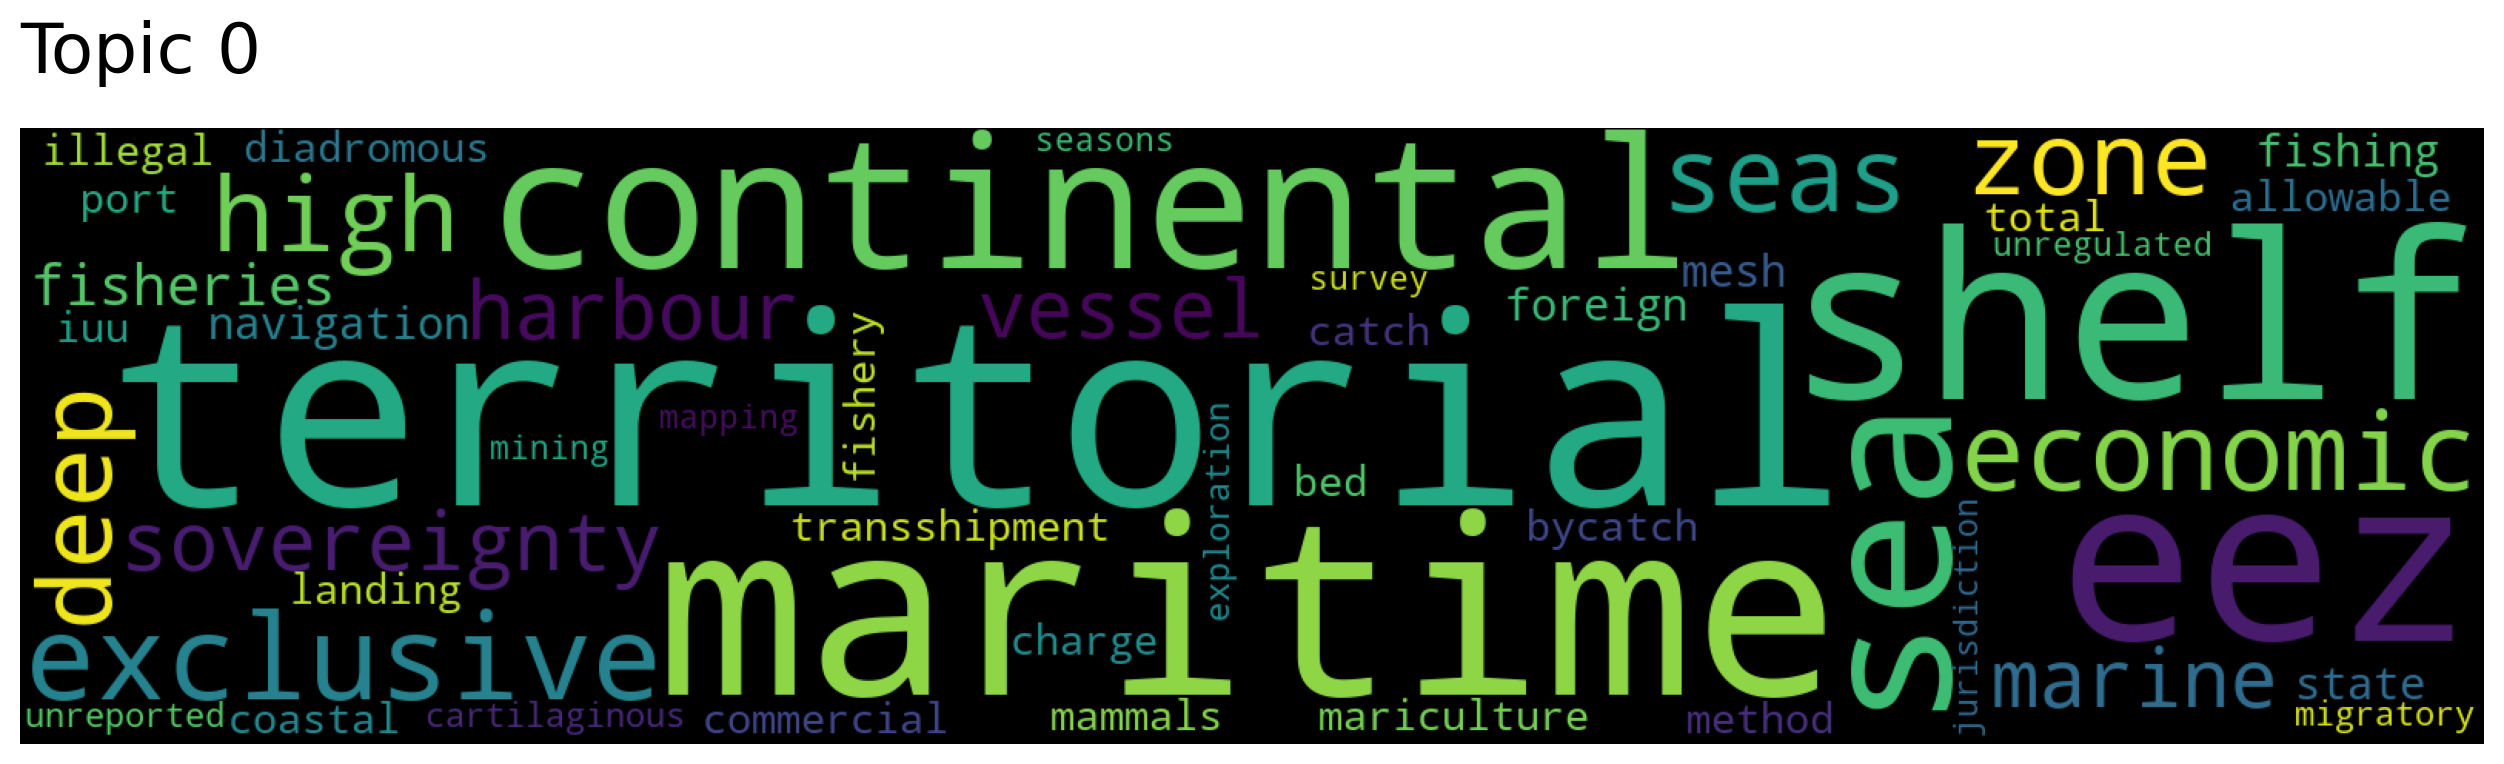

In [13]:
model.generate_topic_wordcloud(0)

In [100]:
# Look up topics corresponding to a keyword
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["waste"], num_topics=10)
print(topic_words)
print(topic_nums)
print(topic_scores)

[array(['sources', 'pays', 'polluter', 'domestic', 'waste', 'solid',
       'prevention', 'recycling', 'disposal', 'principle', 'reuse',
       'hazardous', 'movement', 'air', 'substances', 'pollution',
       'control', 'audit', 'precautionary', 'discharge', 'environmental',
       'effluent', 'plastic', 'noise', 'circular', 'rehabilitation',
       'ozone', 'charges', 'emissions', 'impact', 'freshwater',
       'industrial', 'economy', 'sewerage', 'eia', 'layer',
       'transboundary', 'compensation', 'clean', 'groundwater', 'soil',
       'payments', 'water', 'bioenergy', 'trading', 'assessment', 'prior',
       'ecofriendly', 'healthy', 'loss'], dtype='<U15'), array(['domestic', 'sources', 'solid', 'waste', 'prevention', 'disposal',
       'recycling', 'rehabilitation', 'reuse', 'hazardous', 'effluent',
       'discharge', 'substances', 'soil', 'movement', 'control',
       'pollution', 'pays', 'polluter', 'audit', 'erosion',
       'environmental', 'sewerage', 'improvement', 'pla

## Country co-occurence

- For hver tekst, find tilhørende topic --> noter landet til denne topic

In [46]:
# Compute uniqe countries --> i.e. remove agreement "countries" 
country_new=[]
for coun in country:
    if len(coun.split(";"))>=2:
        for c in coun.split("; "):
            country_new.append(c)
    else:
        country_new.append(coun)

In [582]:
#View all countries
#set(country_new)

In [47]:
# Make country dict --> key: country, value: country index
countries = {}
i=0
for country_x in (list(set(country_new))):
    countries[country_x]=i
    i+=1


In [48]:
# Compute country x topic occurence matrix
topic_sizes, topic_nums = model.get_topic_sizes()
country_topic_matrix = np.zeros((len(set(country_new)),len(topic_nums)))

for num in topic_nums:
    # For each topic get the corresponding documents
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=num,num_docs=topic_sizes[num])
    for id in document_ids:
        # Find the documents' countries and add it to the co-occurence matrix
        if len(country[id].split(";"))>=2:
            for c in country[id].split("; "):
                 country_topic_matrix[countries[c],num] +=1
        else:
            country_topic_matrix[countries[country[id]],num] +=1



In [49]:

 
def get_swap_dict(d):
    return {v: k for k, v in d.items()}

countries_swap = get_swap_dict(countries)

#Standardisering
#for i in range(len(countries)):
 #   country_topic_matrix[i,:]=country_topic_matrix[i,:]/country_new.count(countries_swap[i]) 


In [62]:
def square_rooted(x):
        return np.sqrt(sum([a*a for a in x]))
def co_occurence(country_new,similarity):
    country_co_occurrence = np.zeros((len(set(country_new)),len(set(country_new))))

    for i in range(len(set(country_new))):
        for j in range(len(set(country_new))):
            if similarity == "correlation":
                # Correlation
                country_co_occurrence[i,j] = np.corrcoef(country_topic_matrix[i,:],country_topic_matrix[j,:])[0,1]
            elif similarity == "cosine":
                #Cosine similarity:
                country_co_occurrence[i,j] = country_topic_matrix[i,:]@country_topic_matrix[j,:]/(square_rooted(country_topic_matrix[i,:])*square_rooted(country_topic_matrix[j,:]))
            elif similarity == "euclidean":
                # Eucledean distance
                country_co_occurrence[i,j] = 1/(1+np.linalg.norm(country_topic_matrix[i,:]-country_topic_matrix[j,:]))
    return country_co_occurrence

country_co_occurrence = co_occurence(country_new,"euclidean")
np.shape(country_co_occurrence)

(257, 257)

In [57]:
#Remove small islands

for i in range(len(set(country_new))):
    if country_new.count(countries_swap[i])<=20:
        country_co_occurrence[i] =0
        country_co_occurrence[:,i]=0

# Country Network

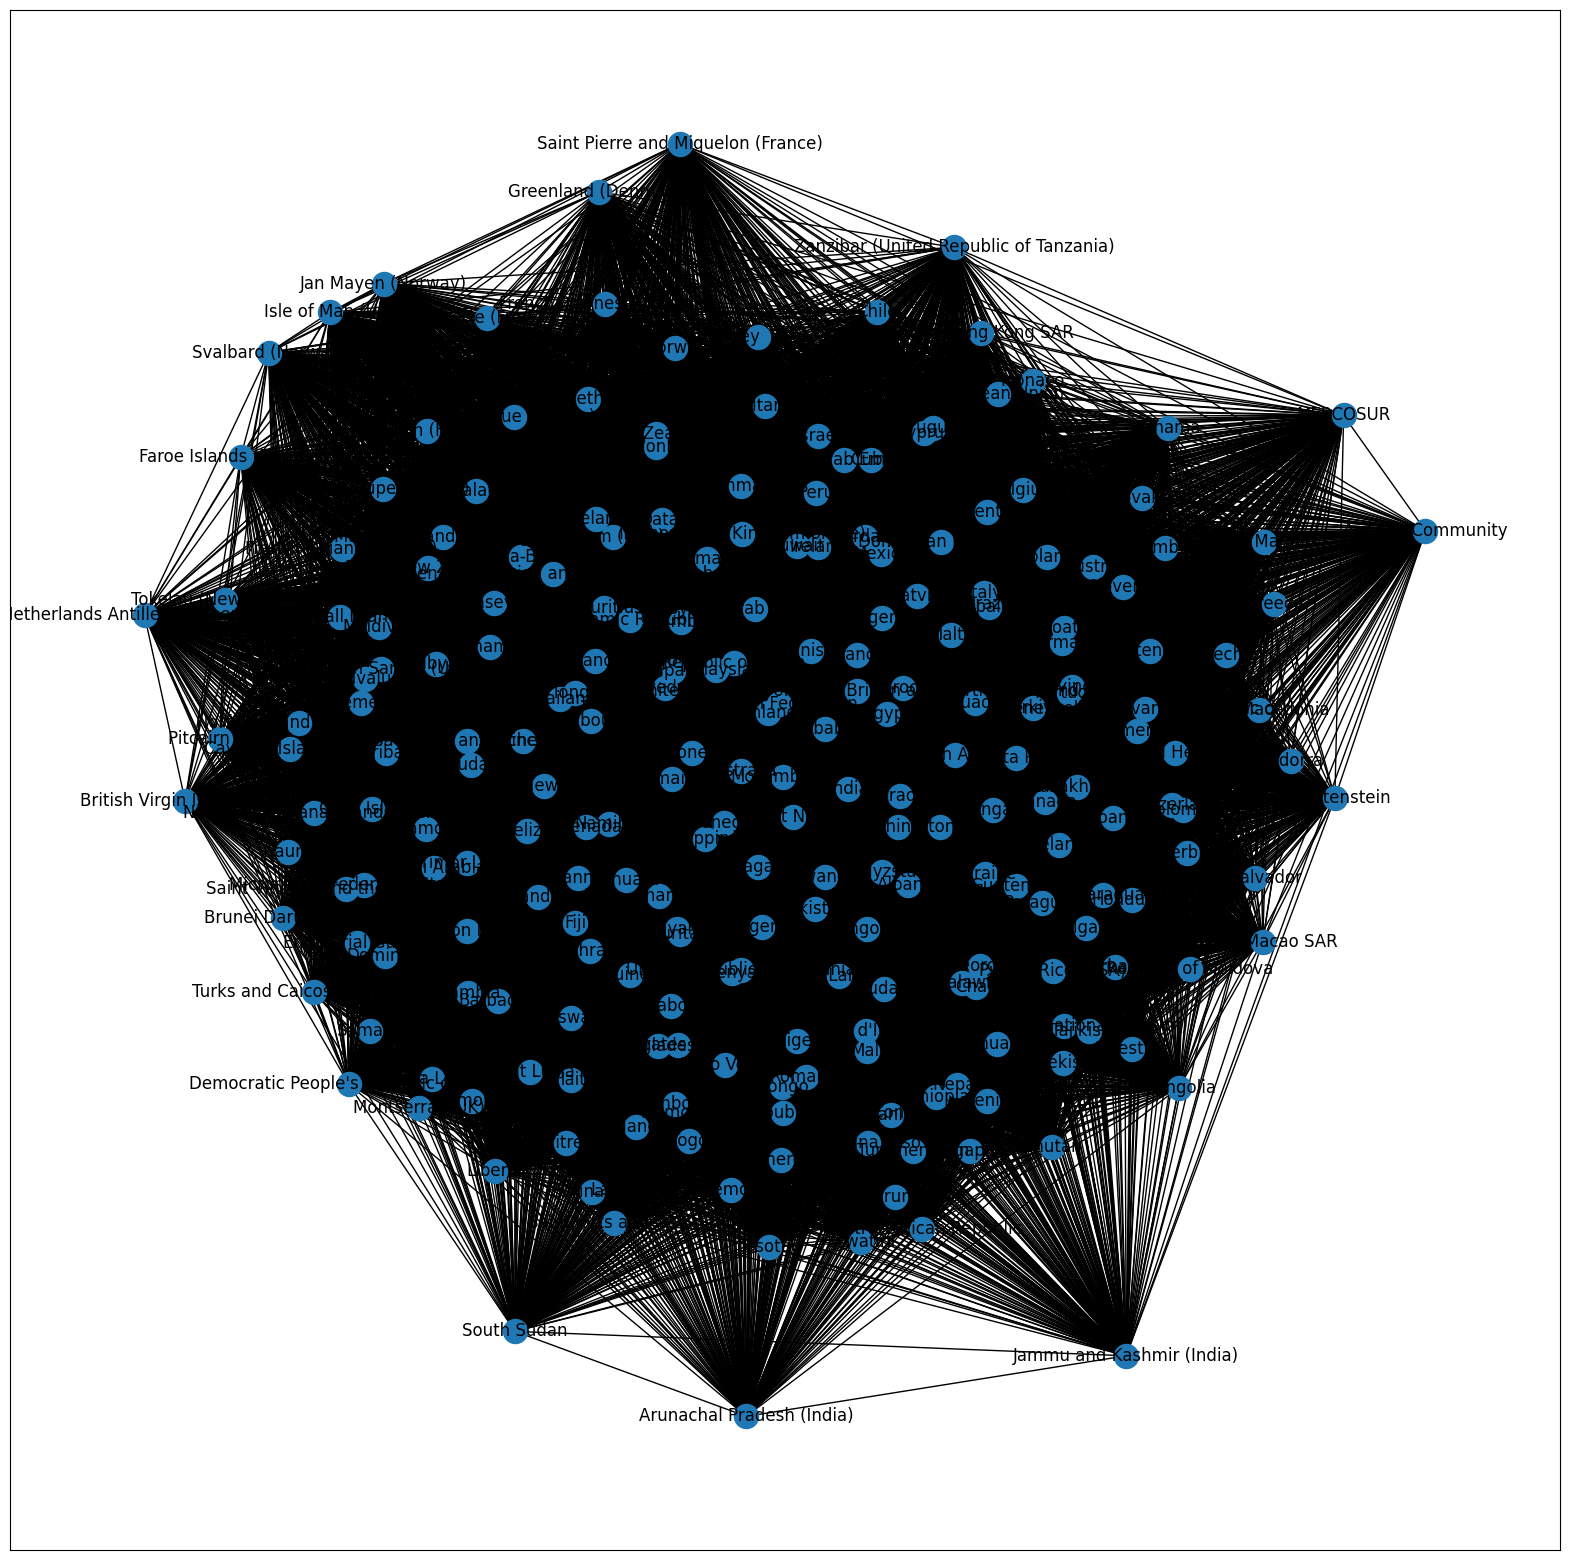

In [58]:
from networkx.algorithms.community import girvan_newman
import networkx as nx
import itertools
import matplotlib.pyplot as plt
countries_swap_copy = countries_swap.copy()

G = nx.Graph()

size = country_co_occurrence.shape[0]


G.add_nodes_from(range(size))

for i in range(size):
        for j in range(i+1, size):
            if country_co_occurrence[i, j] != 0.0:
            #if country_co_ocurrence[i, j] > 0.002:
                G.add_edge(i, j, weight=country_co_occurrence[i, j])
# Remove small isalnds
for i in range(size):
    if np.sum(country_co_occurrence[i])==0:
        G.remove_node(i)
        countries_swap_copy.pop(i)

plt.figure(figsize=(20, 20))
nx.draw_networkx(G, labels=countries_swap_copy,with_labels=True)
#nx.draw_spring(G, labels=countries_swap,with_labels=True)

In [59]:
from networkx.algorithms.community import louvain_communities
comms = louvain_communities(G,weight="weight",resolution=1.5,seed=69)
unique_coms = np.unique(list(comms))

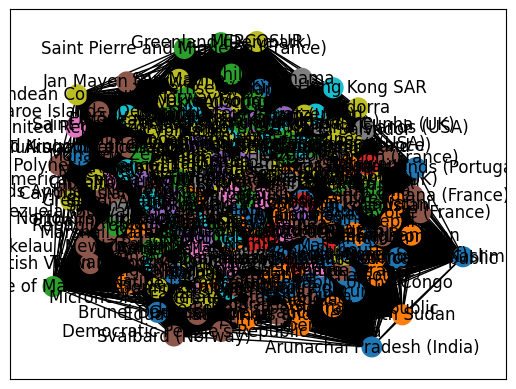

In [60]:
community_assignment = {}

# Assign community indices to nodes
for i, community in enumerate(comms):
    for node in community:
        community_assignment[node] = i

# Create a list of colors for each node based on the community assignment
node_colors = [community_assignment.get(node, -1) for node in G.nodes()]

# Draw the graph with different colors for different communities
pos = nx.spring_layout(G)  # Positions of nodes in the graph layout
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab10, node_size=200)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos,labels=countries_swap_copy)
plt.show()


In [61]:
i=1
communities={}
for community in comms:
    print("c",i)
    com_countries = []
    for c in community:
        print(countries_swap[c])
       # com_countries.append(country)
    #community[i] =com_countries

    i=i+1

c 1
Jammu and Kashmir (India)
India
Haiti
Arunachal Pradesh (India)
c 2
Chad
Cameroon
Côte d'Ivoire
Benin
Burundi
Democratic Republic of the Congo
Gabon
Niger
Mali
Togo
Congo
Guinea
Djibouti
Central African Republic
Burkina Faso
Senegal
c 3
Singapore
Monaco
Brunei Darussalam
China, Macao SAR
Madeira Islands (Portugal)
Bahrain
c 4
Sri Lanka
c 5
Viet Nam
c 6
Comoros
Indonesia
Papua New Guinea
Suriname
Solomon Islands
Liberia
c 7
Eswatini
Nepal
Lesotho
Malawi
Cambodia
Ethiopia
South Sudan
Bangladesh
Rwanda
Bhutan
Uganda
Afghanistan
Zambia
Lao People's Democratic Republic
Zimbabwe
c 8
Mauritania
c 9
Qatar
Jordan
Palestine
Sudan
c 10
Iran (Islamic Republic of)
Eritrea
c 11
Finland
c 12
Mongolia
Uzbekistan
Turkmenistan
Kazakhstan
Kyrgyzstan
Republic of Moldova
Armenia
Belarus
Hungary
Tajikistan
Lithuania
Ukraine
Azerbaijan
Russian Federation
c 13
Argentina
Mexico
Uruguay
Chile
Saint Pierre and Miquelon (France)
Peru
Isle of Man (UK)
Norway
Greenland (Denmark)
New Zealand
c 14
Australia
c 15


In [646]:
# compute similartiy between countries:
#WIP
c1 = ["Pakistan","India"]
print(country_topic_matrix[countries["Pakistan"],:])
print(country_topic_matrix[countries["India"],:])
print(country_co_occurrence[countries["Pakistan"],countries["India"]])
for i in range(250):
    if country_co_occurrence[countries["Pakistan"],i] >=0.3:
        print(i,country_co_occurrence[countries["Pakistan"],i])

[1. 7. 0. ... 0. 0. 0.]
[ 1. 14.  1. ...  0.  0.  0.]
0.34177380012027875
13 0.3107047176504896
62 0.3030246210458938
71 0.34177380012027875
75 1.0
111 0.32447533365591413
131 0.3255293118102358
156 0.3112958517809433
166 0.35946196503805405
183 0.31037017670037603
220 0.3093927881565645
224 0.3262991676190901
249 0.34217898486727466


In [647]:
countries_swap[249]

'Senegal'

# Forskellige topic reduction

In [35]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=200)

KeyboardInterrupt: 

In [197]:
print(model.topic_words_reduced)

[['steroids' 'hormones' 'mrl' 'residue' 'drugs' 'limit' 'hygiene'
  'maximum' 'swine' 'procedures' 'residues' 'sanitary' 'feed'
  'feedstuffs' 'veterinary' 'animal' 'toxicity' 'poultry' 'poisoning'
  'equine' 'slaughtering' 'meat' 'cattle' 'sheep' 'vaccination' 'goats'
  'additives' 'health' 'dairy' 'mercosur' 'safety' 'disinfestation'
  'codex' 'inspection' 'rodents' 'treated' 'haccp' 'disinfection'
  'andean' 'edible' 'packaging' 'pests' 'traceability' 'trade'
  'antimicrobial' 'diseases' 'welfare' 'labelling' 'milk' 'alimentarius']
 ['equine' 'sheep' 'swine' 'goats' 'cattle' 'rodents' 'herd' 'camelids'
  'book' 'reproduction' 'poultry' 'animal' 'slaughtering' 'vaccination'
  'mercosur' 'animals' 'welfare' 'meat' 'health' 'disinfestation' 'birds'
  'jersey' 'hygiene' 'sericulture' 'apiculture' 'steroids' 'hormones'
  'drugs' 'procedures' 'disinfection' 'quarantine' 'identification'
  'north' 'pests' 'feed' 'sanitary' 'ranching' 'inspection' 'marking'
  'captive' 'diseases' 'edible' '

In [202]:
model.topic_words_reduced[4]

array(['viticulture', 'oenological', 'tribunal', 'court', 'herzegovina',
       'beverages', 'tobacco', 'geographical', 'bosnia', 'indication',
       'fraud', 'settlement', 'codex', 'inspection', 'lao',
       'compensation', 'dispute', 'intellectual', 'labelling', 'trade',
       'certification', 'justice', 'practices', 'consumer', 'lanka',
       'liability', 'packaging', 'deceit', 'information', 'plant',
       'haccp', 'traceability', 'alimentarius', 'offences', 'internal',
       'tristan', 'adulteration', 'classification', 'singapore',
       'breeders', 'access', 'seeds', 'commodities', 'vested', 'sugar',
       'floriculture', 'veterinary', 'liechtenstein', 'legal',
       'agricultural'], dtype='<U14')

In [82]:
topic_words,word_scores,topic_nums = model.get_topics(10)
topic_words

array([['mesh', 'fishing', 'seasons', 'size', 'fishery', 'method',
        'cartilaginous', 'catch', 'bycatch', 'fisheries', 'landing',
        'prohibited', 'marine', 'total', 'allowable', 'charge',
        'allocation', 'fishes', 'vessel', 'gear', 'quota', 'artisanal',
        'foreign', 'commercial', 'diadromous', 'port', 'migratory',
        'transshipment', 'turtles', 'mammals', 'molluscs', 'crustaceans',
        'illegal', 'high', 'seas', 'inland', 'iuu', 'territorial',
        'unregulated', 'area', 'exclusive', 'state', 'eez',
        'enhancement', 'management', 'conservation', 'coral',
        'unreported', 'repopulation', 'sea'],
       ['floriculture', 'planting', 'seeds', 'material', 'fibre',
        'plant', 'cane', 'beet', 'variety', 'vegetables', 'breeders',
        'oleaginous', 'legumes', 'fruits', 'edible', 'nuts', 'sugar',
        'certification', 'rice', 'tobacco', 'cereals', 'labelling',
        'weeds', 'crops', 'oenological', 'production', 'packaging',
        '

In [68]:
import pandas as pd
#country data
income = pd.read_excel("CLASS.xlsx")
print(income.keys())

Index(['Economy', 'Code', 'Region', 'Income group', 'Lending category',
       'Other (EMU or HIPC)'],
      dtype='object')


In [144]:

income_countries = list(income["Economy"])
income_groups = list(income["Income group"])
income_listed_countries =[]
countries_income_dic ={}
for i in range(len(income_countries)):
    for j in range(len(countries_swap)):
        if income_countries[i] == countries_swap[j]:
            income_listed_countries.append(j)
            if income_groups[i] == "Low income":
                countries_income_dic[j]= 0
            elif income_groups[i] == "Lower middle income":
                countries_income_dic[j]= 1
            elif income_groups[i] == "Upper middle income":
                countries_income_dic[j]= 2
            elif income_groups[i] == "High income":
                countries_income_dic[j]= 3
missing_income_countries = []
missing_income_countries_names=[]
for i in range(len(countries_swap)):
    if i not in income_listed_countries:
        missing_income_countries.append(i)
        missing_income_countries_names.append([countries_swap[i]])


In [116]:
""""
manual_income =  []
for i in missing_income_countries:
    countries_income_dic[i]= manual_income[i]
"""

'Lower middle income'

In [145]:
# Compare countries income: function takes a list of country indexes and returns the rang between lowest and higest income country and the standard deviation
def check_income(community):
    com_income = []
    for i in community:
        com_income.append(countries_income_dic[i])
    range = max(com_income)-min(com_income)
    std = np.std(com_income)
    return range, std
    

    

In [148]:
c1 = [countries["Denmark"],countries["Sweden"]]
check_income(c1)

(0, 0.0)

# Data analyse

In [78]:
print(keywords[15])
print(len(keywords[15]))

marine fisheries traditional rights/customary rights fishing authorization allocation/quota fishery management and conservation
127


In [66]:
# Tæl hvor mange der er repealed inden for et dato interval
dates=data["Date of original text"]
repealed=data["Repealed"]
antal=0
for i in range(1800,2022):
    c=dates==str(i)
    d=repealed=="Y"
    antal+=sum(c*d)
print(antal)


965


In [ ]:
#Append country to keywords -- outdated
#i=0

#for words in keywords:
 #   keywords[i]=words + [" "+country[i]]
  #  i+=1

In [ ]:
# Find number of extinct domains
a= list(set(data["Domain"]))
i=0
for words in a:
    if type(words)!=str:
        #print("type= ",type(words)," Index = ", i)
        words="Nan"
    a[i]=words.split(";")

    i+=1

In [ ]:
# print different domains
a=sum(a,[])
i=0
for word in a:
        word=word.strip()
        a[i]=word
        i+=1

print(set(a))



In [ ]:
# Count number documents in a language
languages=list(data["Language of document"])
print(languages.count("English"))

In [125]:
set(country)

{'Cameroon; Senegal',
 'Armenia; Azerbaijan; Belarus; Kazakhstan; Kyrgyzstan; Republic of Moldova; Russian Federation; Tajikistan; Turkmenistan; Uzbekistan; Ukraine',
 'European Union; Sao Tome and Principe',
 'Switzerland; Uzbekistan',
 'Russian Federation; Jordan',
 'Russian Federation; Saudi Arabia',
 'Portugal; Mozambique; Eswatini',
 'France; India',
 'Central African Republic',
 'Germany; Latvia',
 'Angola; Botswana; Democratic Republic of the Congo; Lesotho; Malawi; Mauritius; Mozambique; Namibia; Seychelles; South Africa; Eswatini; United Republic of Tanzania; Zambia; Zimbabwe',
 'Uruguay; Brazil',
 'Philippines; Indonesia',
 'Clipperton Island (France)',
 "Benin; Burkina Faso; Cameroon; Chad; Côte d'Ivoire; Guinea; Mali; Niger; Nigeria",
 'United States of America; American Samoa (USA)',
 'Senegal; United States of America',
 'Qatar',
 'China; Australia',
 'Papua New Guinea; Solomon Islands',
 'Cabo Verde; Japan',
 'Northern Mariana Islands (USA)',
 'United Kingdom of Great Br

- Cluster topics
- Dendogram